## https://www.kaggle.com/competitions/nlp-getting-started

In [ ]:
!pip install --upgrade keras-nlp

In [1]:
import tensorflow as tf
import pandas as pd
import keras_nlp
import keras
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import pandas as pd

2024-05-06 20:39:29.001143: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-06 20:39:29.567428: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: usr/local/cuda-12.1/lib64:
2024-05-06 20:39:29.567476: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2024-05-06 20:39:31.053444: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared

ModuleNotFoundError: No module named 'keras_nlp'

In [3]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

In [4]:
df_train['length'] = df_train['text'].apply(lambda x: len(x))
df_test['length'] = df_test['text'].apply(lambda x: len(x))

In [36]:
df_test

,id,keyword,location,text,length
0,0,NaN,NaN,Just happened a terrible car crash,34
1,2,NaN,NaN,"Heard about #earthquake is different cities, s...",64
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are...",96
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires,40
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan,45
...,...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...,55
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...,139
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...,55
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...,65


In [6]:
df_train.head(2)

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38


In [6]:
df_train.length.max()

157

In [7]:
df_test.length.max()

151

In [44]:
EPOCHS = 4
AUTO = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 32
NUM_TRAINING_EXAMPLES = df_train.shape[0]
TRAIN_SPLIT = 0.8
VAL_SPLIT = 0.2
STEPS_PER_EPOCH = int(NUM_TRAINING_EXAMPLES) * TRAIN_SPLIT // BATCH_SIZE

In [9]:
X = df_train['text']
y = df_train['target']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_SPLIT, random_state=42)
X_test = df_test['text']

In [10]:
# https://keras.io/api/keras_nlp/models/

preset = 'distil_bert_base_en_uncased'
preprocessor = keras_nlp.models.DistilBertPreprocessor.from_preset(preset=preset,
                                                                   sequence_length=160,
                                                                   name='preprocessor_4_tweets')

classifier = keras_nlp.models.DistilBertClassifier.from_preset(preset=preset, preprocessor=preprocessor, num_classes=2)
classifier.summary()


100%|██████████| 580/580 [00:00<00:00, 1.49MB/s]
100%|██████████| 226k/226k [00:00<00:00, 2.42MB/s]
100%|██████████| 515/515 [00:00<00:00, 847kB/s]
100%|██████████| 253M/253M [00:03<00:00, 77.2MB/s]


Preprocessor: "preprocessor_4_tweets"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Tokenizer (type)                                   ┃                                             Vocab # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ distil_bert_tokenizer (DistilBertTokenizer)        │                                              30,522 │
└────────────────────────────────────────────────────┴─────────────────────────────────────────────────────┘

Model: "distil_bert_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)     │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ token_ids (InputLayer)        │ (None, None)              │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ distil_bert_backbone          │ (None, None, 768)         │      66,362,880 │ padding_mask[0][0],        │
│ (DistilBertBackbone)          │                           │                 │ token_ids[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ get_item (GetItem)            │ (None, 768)               │               0 │ distil_bert_backbone[0][0] │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pooled_dense (Dense)          │ (None, 768)               │         590,592 │ get_item[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ output_dropout (Dropout)      │ (None, 768)               │               0 │ pooled_dense[0][0]         │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ logits (Dense)                │ (None, 2)                 │           1,538 │ output_dropout[0][0]       │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 66,955,010 (255.41 MB)

 Trainable params: 66,955,010 (255.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
classifier.compile(loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                   optimizer=keras.optimizers.Adam(1e-5),
                   metrics=['accuracy'])

history = classifier.fit(x=X_train,
                         y=y_train,
                         batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(X_val, y_val))

Epoch 1/4
  1/191 ━━━━━━━━━━━━━━━━━━━━ 3:18:08 63s/step - accuracy: 0.8438 - loss: 0.3942

In [13]:
def displayConfusionMatrix(y_true, y_pred, dataset):


    disp = ConfusionMatrixDisplay.from_predictions(y_true,
                                                   np.argmax(y_pred, axis=1),
                                                   display_labels=["Not Disaster", "Disaster"],
                                                   cmap=plt.cm.Blues)

    tn, fp, fn, tp = confusion_matrix(y_true, np.argmax(y_pred, axis=1)).ravel()
    f1_score = tp / ((tp + (fn + fp) )/ 2)
    disp.ax_.set_title("Confusion matrix on " + dataset + "dataset -- F1 Score: " + str(f1_score.round(2)))

191/191 ━━━━━━━━━━━━━━━━━━━━ 33s 160ms/step


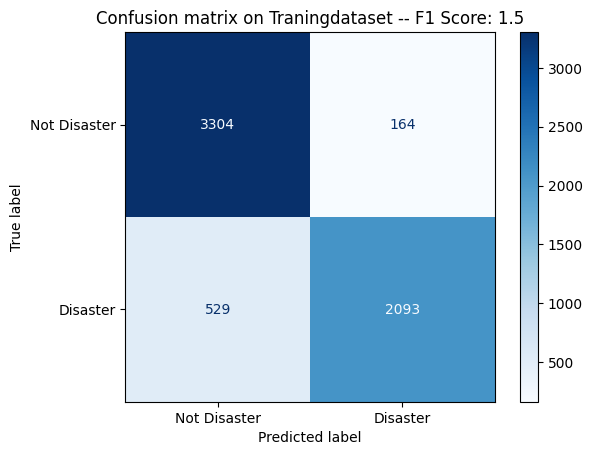

In [14]:
y_pred_train = classifier.predict(X_train)
displayConfusionMatrix(y_train, y_pred_train, "Traning")

48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 156ms/step


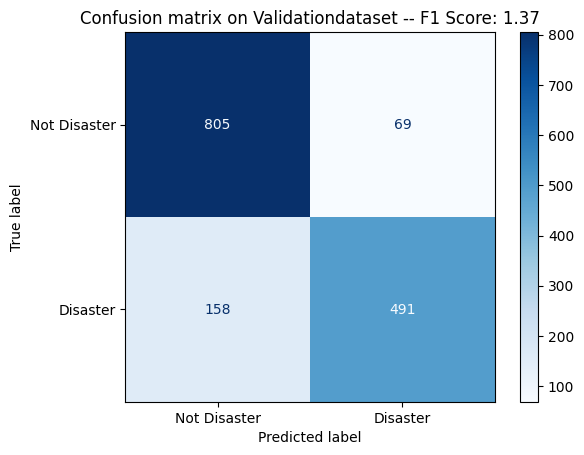

In [15]:
y_pred_val = classifier.predict(X_val)
displayConfusionMatrix(y_val, y_pred_val, "Validation")

In [39]:
sample_submission = pd.DataFrame()
sample_submission['id'] = df_test.id
sample_submission["target"] = np.argmax(classifier.predict(X_test), axis=1)

102/102 ━━━━━━━━━━━━━━━━━━━━ 15s 150ms/step


In [42]:
sample_submission.to_csv("submission.csv", index=False)

In [43]:
sample_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
